In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_decision_regions

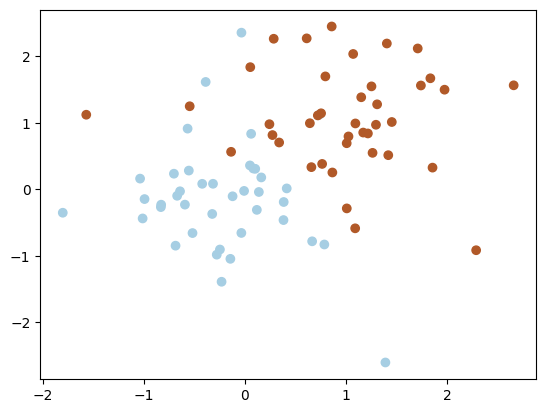

In [3]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [27]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=1000, activation="relu"),
    layers.Dense(units=1000, activation="relu"),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [28]:
my_first_neural_net.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              3000      
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 output (Dense)              (None, 1)                 1001      
                                                                 
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________


In [29]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
                                  loss= tf.keras.losses.binary_crossentropy, 
                                  metrics=['accuracy'])

In [30]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Epoch 1/5000
3/3 - 0s - loss: 0.6798 - accuracy: 0.6875 - 347ms/epoch - 116ms/step
Epoch 2/5000
3/3 - 0s - loss: 0.6265 - accuracy: 0.7625 - 14ms/epoch - 5ms/step
Epoch 3/5000
3/3 - 0s - loss: 0.5881 - accuracy: 0.8250 - 15ms/epoch - 5ms/step
Epoch 4/5000
3/3 - 0s - loss: 0.5514 - accuracy: 0.8375 - 13ms/epoch - 4ms/step
Epoch 5/5000
3/3 - 0s - loss: 0.5224 - accuracy: 0.8500 - 14ms/epoch - 5ms/step
Epoch 6/5000
3/3 - 0s - loss: 0.4944 - accuracy: 0.8750 - 14ms/epoch - 5ms/step
Epoch 7/5000
3/3 - 0s - loss: 0.4688 - accuracy: 0.8750 - 15ms/epoch - 5ms/step
Epoch 8/5000
3/3 - 0s - loss: 0.4471 - accuracy: 0.8625 - 15ms/epoch - 5ms/step
Epoch 9/5000
3/3 - 0s - loss: 0.4273 - accuracy: 0.8625 - 14ms/epoch - 5ms/step
Epoch 10/5000
3/3 - 0s - loss: 0.4078 - accuracy: 0.8750 - 15ms/epoch - 5ms/step
Epoch 11/5000
3/3 - 0s - loss: 0.3914 - accuracy: 0.9000 - 15ms/epoch - 5ms/step
Epoch 12/5000
3/3 - 0s - loss: 0.3751 - accuracy: 0.9125 - 14ms/epoch - 5ms/step
Epoch 13/5000
3/3 - 0s - loss: 0.3

9600/9600 [==============================] - 15s 2ms/step


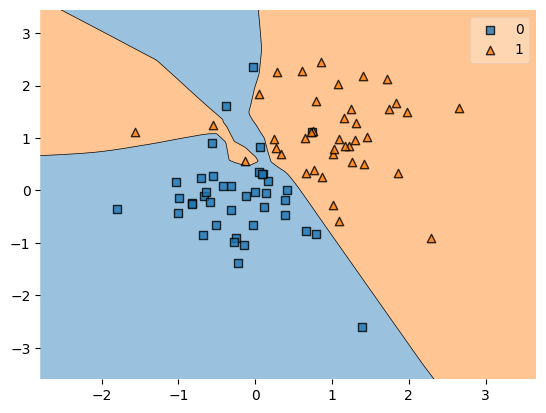

In [31]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [13]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.9875


[0.025727638974785805, 0.987500011920929]

In [14]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 2.3370 - accuracy: 0.8375


[2.336977481842041, 0.8374999761581421]

In [38]:
#apply regularization to the model
my_first_neural_net_reg = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=1000, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(units=1000, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(units=1, activation="sigmoid", name="output")
])


In [43]:
my_first_neural_net_reg.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1000)              3000      
                                                                 
 dense_20 (Dense)            (None, 1000)              1001000   
                                                                 
 output (Dense)              (None, 1)                 1001      
                                                                 
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________


In [40]:
#compliing model with similar values as before
my_first_neural_net_reg.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                    loss= tf.keras.losses.binary_crossentropy,
                                    metrics=['accuracy'])
                                    

In [41]:
#fit the new model with regularization in place
history_reg = my_first_neural_net_reg.fit(X_train, y_train, epochs=5000, verbose=2)


Epoch 1/5000
3/3 - 0s - loss: 10.6695 - accuracy: 0.5125 - 382ms/epoch - 127ms/step
Epoch 2/5000
3/3 - 0s - loss: 10.5005 - accuracy: 0.8500 - 18ms/epoch - 6ms/step
Epoch 3/5000
3/3 - 0s - loss: 10.3447 - accuracy: 0.8625 - 17ms/epoch - 6ms/step
Epoch 4/5000
3/3 - 0s - loss: 10.1955 - accuracy: 0.8625 - 16ms/epoch - 5ms/step
Epoch 5/5000
3/3 - 0s - loss: 10.0525 - accuracy: 0.8625 - 18ms/epoch - 6ms/step
Epoch 6/5000
3/3 - 0s - loss: 9.9159 - accuracy: 0.8625 - 17ms/epoch - 6ms/step
Epoch 7/5000
3/3 - 0s - loss: 9.7783 - accuracy: 0.8750 - 16ms/epoch - 5ms/step
Epoch 8/5000
3/3 - 0s - loss: 9.6474 - accuracy: 0.8875 - 14ms/epoch - 5ms/step
Epoch 9/5000
3/3 - 0s - loss: 9.5196 - accuracy: 0.8625 - 14ms/epoch - 5ms/step
Epoch 10/5000
3/3 - 0s - loss: 9.3932 - accuracy: 0.9125 - 14ms/epoch - 5ms/step
Epoch 11/5000
3/3 - 0s - loss: 9.2705 - accuracy: 0.9000 - 14ms/epoch - 5ms/step
Epoch 12/5000
3/3 - 0s - loss: 9.1500 - accuracy: 0.9125 - 13ms/epoch - 4ms/step
Epoch 13/5000
3/3 - 0s - loss

9600/9600 [==============================] - 15s 2ms/step


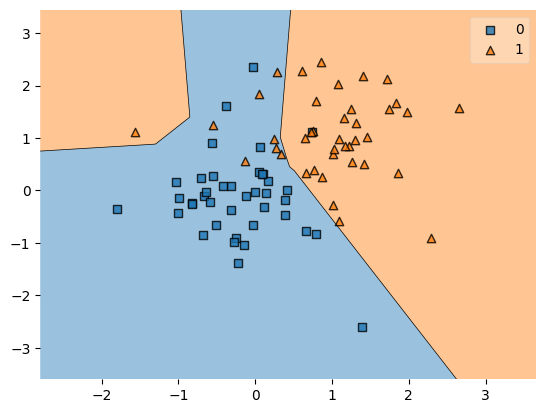

In [42]:
#plot the decision regions for the new model
plot_decision_regions(X_train, y_train, clf=my_first_neural_net_reg)
plt.show()


In [44]:
#apply dropout to a new model
my_first_neural_net_drop = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=1000, activation="relu"),
    layers.Dropout(.8),
    layers.Dense(units=1000, activation="relu"),
    layers.Dropout(.8),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

#show the summary of the new model
my_first_neural_net_drop.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              3000      
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_22 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 output (Dense)              (None, 1)                 1001      
                                                                 
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
#compile and fit the new model
my_first_neural_net_drop.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                    loss= tf.keras.losses.binary_crossentropy,
                                    metrics=['accuracy'])

history_drop = my_first_neural_net_drop.fit(X_train, y_train, epochs=5000, verbose=2)
    

Epoch 1/5000
3/3 - 0s - loss: 0.1251 - accuracy: 0.9500 - 395ms/epoch - 132ms/step
Epoch 2/5000
3/3 - 0s - loss: 0.0954 - accuracy: 0.9500 - 14ms/epoch - 5ms/step
Epoch 3/5000
3/3 - 0s - loss: 0.0847 - accuracy: 0.9750 - 15ms/epoch - 5ms/step
Epoch 4/5000
3/3 - 0s - loss: 0.1094 - accuracy: 0.9375 - 17ms/epoch - 6ms/step
Epoch 5/5000
3/3 - 0s - loss: 0.0893 - accuracy: 0.9375 - 17ms/epoch - 6ms/step
Epoch 6/5000
3/3 - 0s - loss: 0.1041 - accuracy: 0.9625 - 16ms/epoch - 5ms/step
Epoch 7/5000
3/3 - 0s - loss: 0.1321 - accuracy: 0.9375 - 16ms/epoch - 5ms/step
Epoch 8/5000
3/3 - 0s - loss: 0.1081 - accuracy: 0.9500 - 15ms/epoch - 5ms/step
Epoch 9/5000
3/3 - 0s - loss: 0.1050 - accuracy: 0.9625 - 16ms/epoch - 5ms/step
Epoch 10/5000
3/3 - 0s - loss: 0.0814 - accuracy: 0.9750 - 16ms/epoch - 5ms/step
Epoch 11/5000
3/3 - 0s - loss: 0.0985 - accuracy: 0.9500 - 17ms/epoch - 6ms/step
Epoch 12/5000
3/3 - 0s - loss: 0.1084 - accuracy: 0.9625 - 16ms/epoch - 5ms/step
Epoch 13/5000
3/3 - 0s - loss: 0.1

9600/9600 [==============================] - 15s 2ms/step


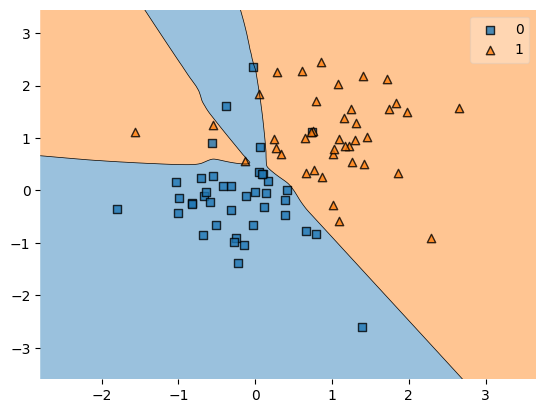

In [37]:
#plot the decision regions for the new model
plot_decision_regions(X_train, y_train, clf=my_first_neural_net_drop)
plt.show()
